In [1]:
# from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
from neurite_sandbox.tf.models import labels_to_labels
from neurite_sandbox.tf.utils.augment import add_outside_shapes
from neurite.tf.utils.augment import draw_perlin_full
from scipy.ndimage import distance_transform_edt
import scipy.ndimage as ndi
import tensorflow.keras.layers as KL
import voxelmorph as vxm


import argparse
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pathlib
# import surfa as sf
import re
import json
from keras import backend as K
import param_3d
import data
import model_3d
from data_3d import *
import scipy.ndimage as ndimage

import nibabel as nib
from tqdm import tqdm
from tensorflow.keras.layers import Lambda

from utils import *
from help import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Check devices
print("Available devices:", tf.config.list_physical_devices())

def get_pig_model(k1,k2):
    epsilon =1e-7
    min_max_norm = Lambda(lambda x: (x - K.min(x)) / (K.max(x) - K.min(x)+ epsilon) * (1.0) )
    
    print("model is loading")
    en = [16 ,16 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64]
    de = [64 ,64 ,64 ,64, 64 ,64 ,64, 64, 64, 16 ,16 ,2]
    input_img = Input(shape=(param_3d.img_size_192,param_3d.img_size_192,param_3d.img_size_192, 1))
    unet_model = vxm.networks.Unet(inshape=(param_3d.img_size_192,param_3d.img_size_192,param_3d.img_size_192, 1), nb_features=(en, de),
                       nb_conv_per_level=2,
                       final_activation_function='softmax')
        
    latest_weight = max(glob.glob(os.path.join("models_gmm_"+str(k1)+"_"+str(k2), 'weights_epoch_*.h5')), key=os.path.getctime, default=None)
    print(latest_weight)
    generated_img_norm = min_max_norm(input_img)
    segmentation = unet_model(generated_img_norm)
    combined_model = Model(inputs=input_img, outputs=segmentation)
    combined_model.load_weights(latest_weight)
    return combined_model

def get_pig_model_128():
    epsilon =1e-7
    min_max_norm = Lambda(lambda x: (x - K.min(x)) / (K.max(x) - K.min(x)+ epsilon) * (1.0) )
    
    print("model is loading")
    en = [16 ,16 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64]
    de = [64 ,64 ,64 ,64, 64 ,64 ,64, 64, 64, 16 ,16 ,2]
    input_img = Input(shape=(param_3d.img_size_128,param_3d.img_size_128,param_3d.img_size_128, 1))
    unet_model = vxm.networks.Unet(inshape=(param_3d.img_size_128,param_3d.img_size_128,param_3d.img_size_128, 1), nb_features=(en, de),
                       nb_conv_per_level=2,
                       final_activation_function='softmax')
        
    latest_weight = max(glob.glob(os.path.join("models_gmm_4_8_128", 'weights_epoch_*.h5')), key=os.path.getctime, default=None)
    print(latest_weight)
    generated_img_norm = min_max_norm(input_img)
    segmentation = unet_model(generated_img_norm)
    combined_model = Model(inputs=input_img, outputs=segmentation)
    combined_model.load_weights(latest_weight)
    return combined_model

def get_pig_model_96():
    epsilon =1e-7
    min_max_norm = Lambda(lambda x: (x - K.min(x)) / (K.max(x) - K.min(x)+ epsilon) * (1.0) )
    
    print("model is loading")
    en = [16 ,16 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64]
    de = [64 ,64 ,64 ,64, 64 ,64 ,64, 64, 64, 16 ,16 ,2]
    input_img = Input(shape=(param_3d.img_size_96,param_3d.img_size_96,param_3d.img_size_96, 1))
    unet_model = vxm.networks.Unet(inshape=(param_3d.img_size_96,param_3d.img_size_96,param_3d.img_size_96, 1), nb_features=(en, de),
                       nb_conv_per_level=2,
                       final_activation_function='softmax')
        
    latest_weight = max(glob.glob(os.path.join("models_gmm_4_6_96", 'weights_epoch_*.h5')), key=os.path.getctime, default=None)
    print(latest_weight)
    generated_img_norm = min_max_norm(input_img)
    segmentation = unet_model(generated_img_norm)
    combined_model = Model(inputs=input_img, outputs=segmentation)
    combined_model.load_weights(latest_weight)
    return combined_model

def get_pig_model_olfactory_96():
    epsilon =1e-7
    min_max_norm = Lambda(lambda x: (x - K.min(x)) / (K.max(x) - K.min(x)+ epsilon) * (1.0) )
    
    print("model is loading")
    en = [16 ,16 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64]
    de = [64 ,64 ,64 ,64, 64 ,64 ,64, 64, 64, 16 ,16 ,2]
    input_img = Input(shape=(param_3d.img_size_96,param_3d.img_size_96,param_3d.img_size_96, 1))
    unet_model = vxm.networks.Unet(inshape=(param_3d.img_size_96,param_3d.img_size_96,param_3d.img_size_96, 1), nb_features=(en, de),
                       nb_conv_per_level=2,
                       final_activation_function='softmax')
        
    latest_weight = max(glob.glob(os.path.join("models_gmm_4_6_96_olfactory", 'weights_epoch_*.h5')), key=os.path.getctime, default=None)
    print(latest_weight)
    generated_img_norm = min_max_norm(input_img)
    segmentation = unet_model(generated_img_norm)
    combined_model = Model(inputs=input_img, outputs=segmentation)
    combined_model.load_weights(latest_weight)
    return combined_model

/cbica/home/dadashkj/neurite/neurite/__init__.py:33: FutureWarning: The default backend will soon be changing to 'pytorch'. If you prefer to use TensorFlow, please set the NEURITE_BACKEND environment variable to 'tensorflow'.
  backend = py.utils.get_backend()
/cbica/home/dadashkj/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Issue loading cv2


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2025-03-25 19:26:57.504700: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-25 19:26:57.504835: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: cubic-login1
2025-03-25 19:26:57.504868: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: cubic-login1
2025-03-25 19:26:57.505050: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.183.1
2025-03-25 19:26:57.505135: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.183.1
2025-03-25 19:26:57.505153: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.183.1


In [2]:
k1=4
k2=8
validation_folder_path = "/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask"

subfolders = [f.name for f in os.scandir(validation_folder_path) if f.is_dir()]
combined_model = get_pig_model(k1,k2)
combined_model_128 = get_pig_model_128()
combined_model_96 = get_pig_model_olfactory_96() #0get_pig_model_96()
# combined_model_olfactory_96 = get_pig_model_olfactory_96()

model is loading
models_gmm_4_8/weights_epoch_80.h5
model is loading
models_gmm_4_8_128/weights_epoch_500.h5
model is loading
models_gmm_4_6_96_olfactory/weights_epoch_2280.h5


model is loading
models_gmm_4_8/weights_epoch_80.h5
model is loading
models_gmm_4_8_128/weights_epoch_500.h5
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-082/JAW-082_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!
(192, 192, 192)


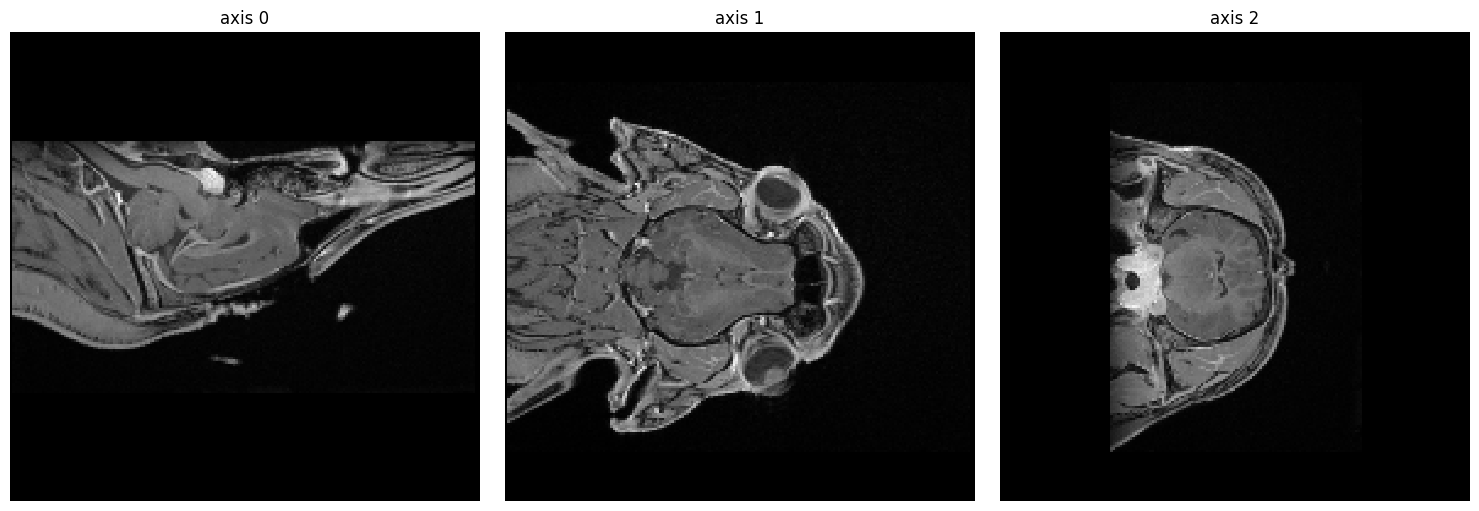

Initial Prediction Result:
first step:  0.9300032468343365
first step:  0.9302495228387845


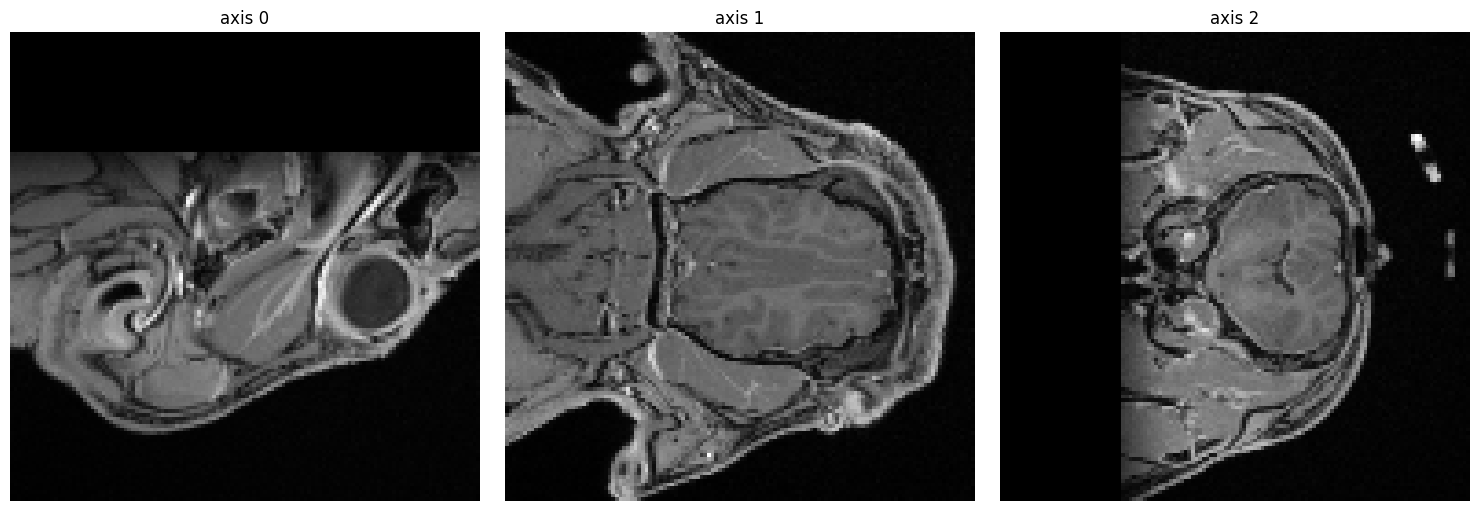

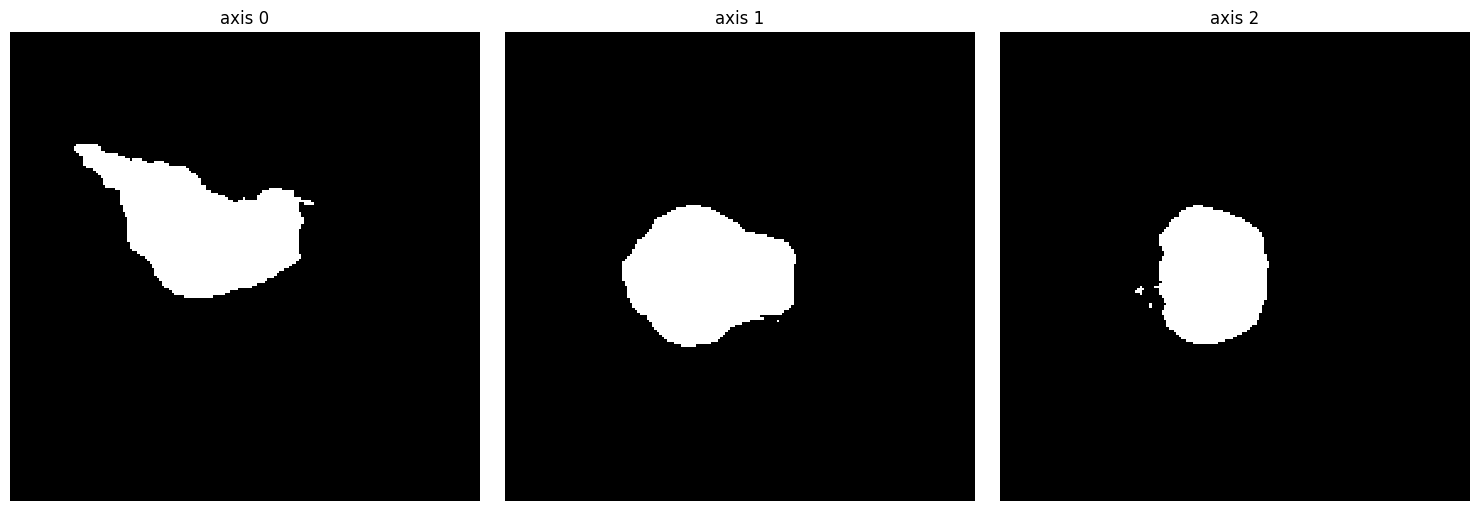

second step:  0.9095482031747885
third step:  0.9345213343205169


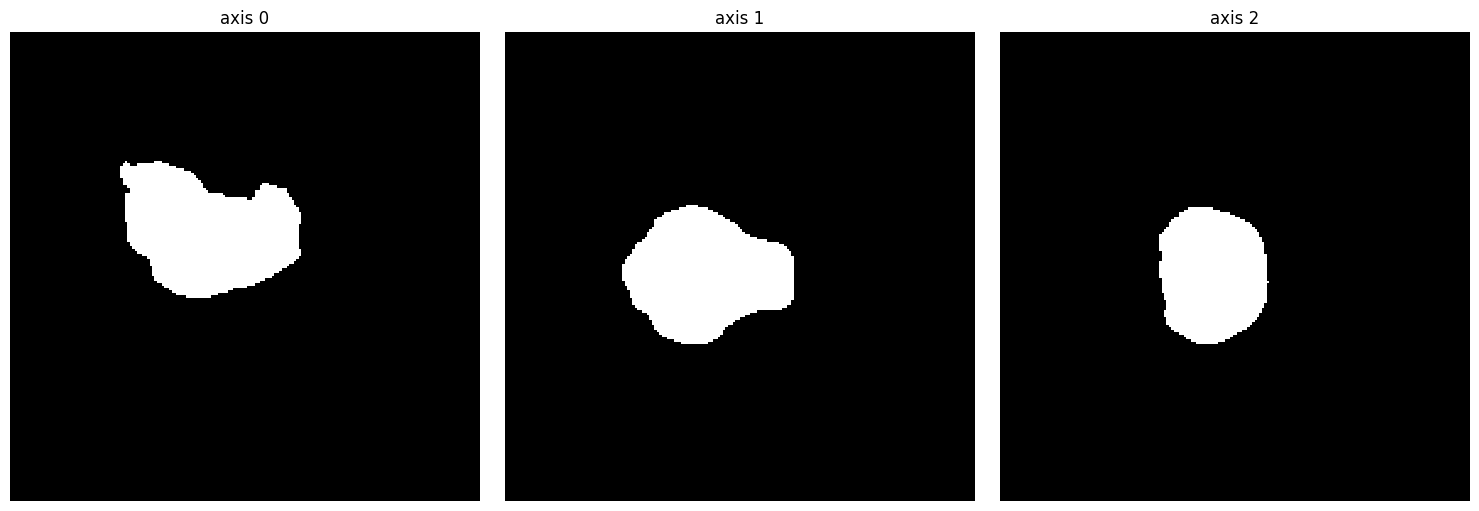

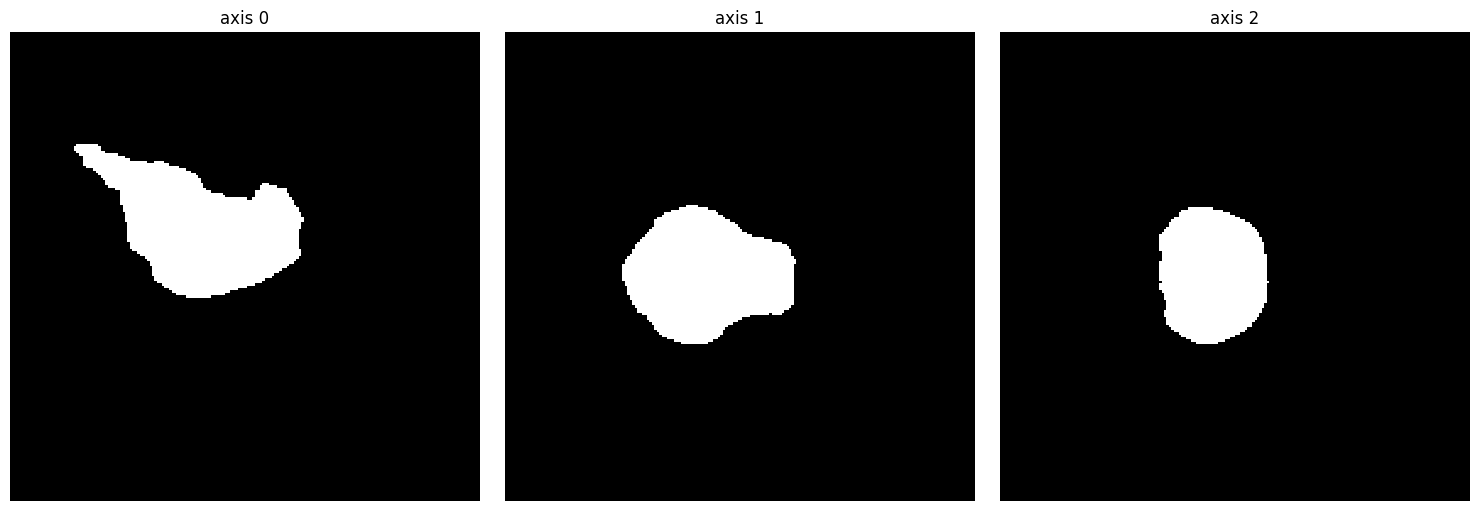

majority voting:  0.9303011264414444
[DEBUG] NiftiArrayIO.load(): no header extensions found!
@@ template


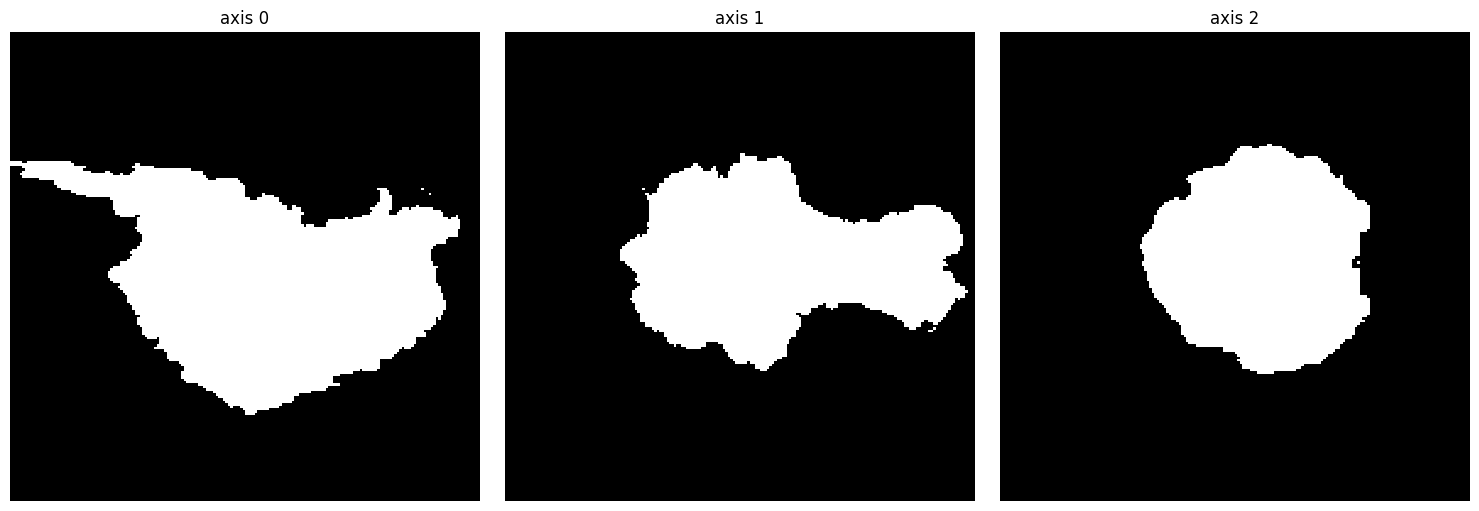

@@ after registeration


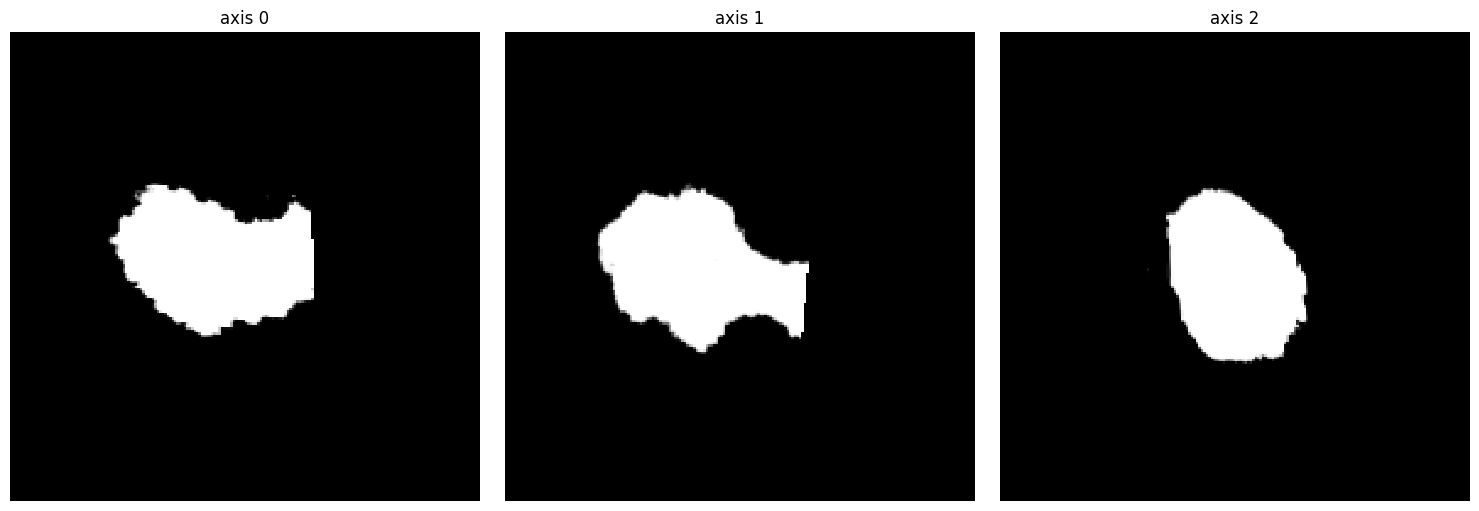

@@@@@@ (192, 192, 192)


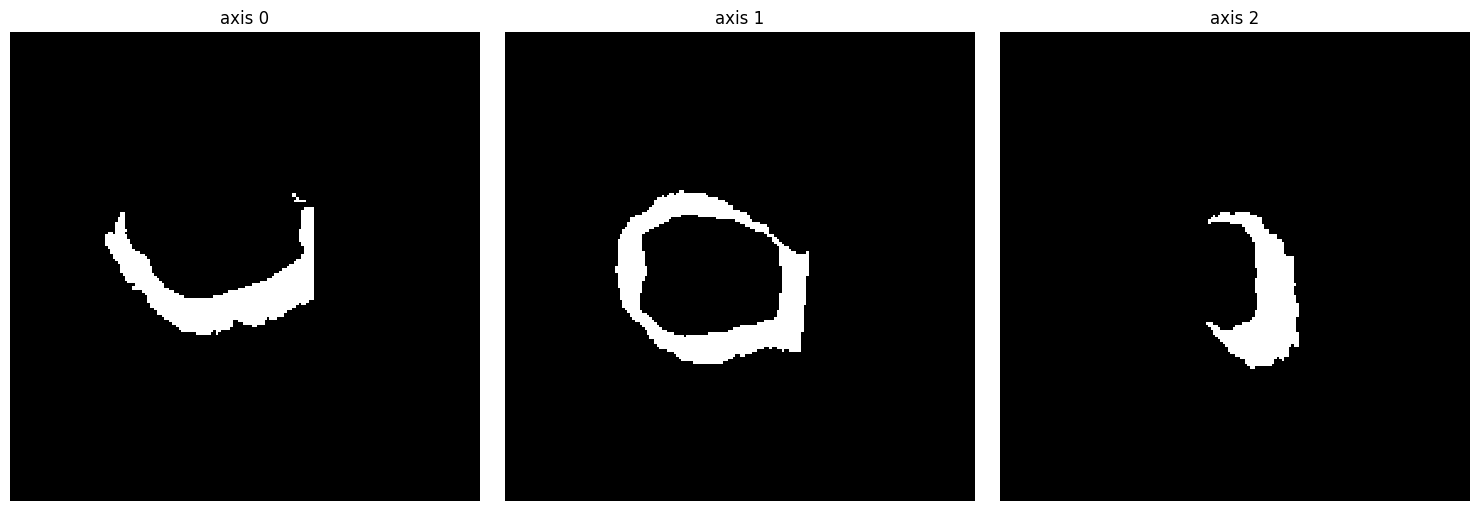

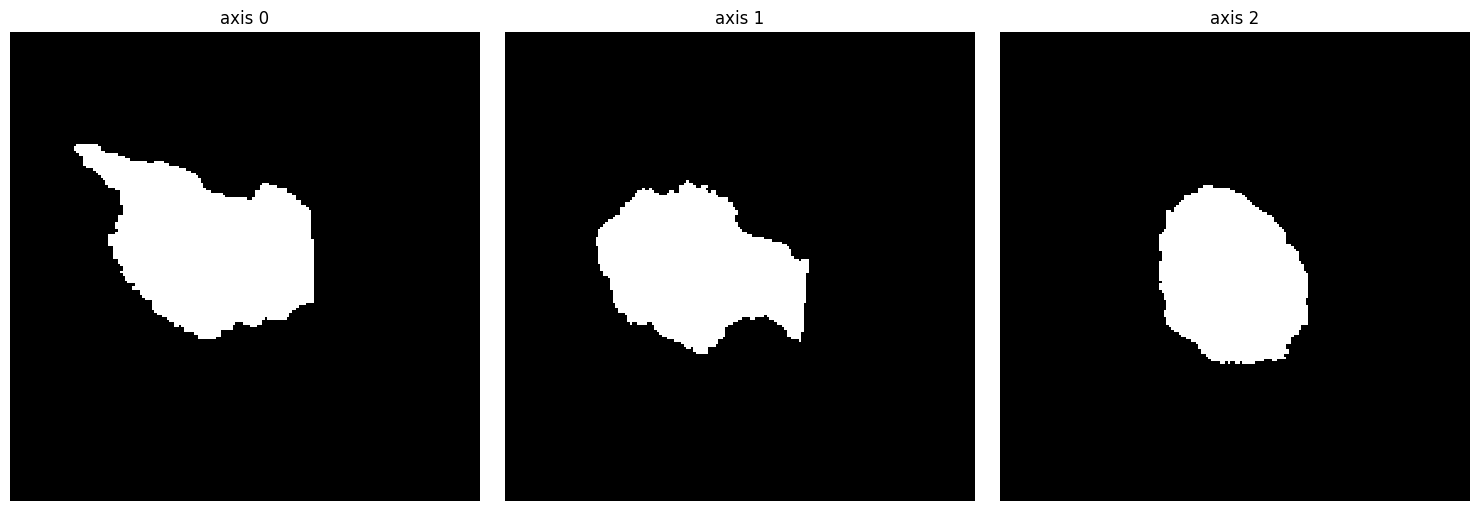

Dice coefficient for JAW-082: 0.6293
NO MASK FOUND
Overall Dice coefficient: 0.6293


In [18]:
import os
import numpy as np
import surfa as sf
import neurite as ne
from scipy import ndimage
from sklearn.metrics import jaccard_score
from utils import find_bounding_box, find_random_bounding_box, apply_gaussian_smoothing, extract_cube
import SimpleITK as sitk  # Import SimpleITK for image registration


validation_folder_path = "/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask"
# validation_folder_path = "results"

subfolders = [f.name for f in os.scandir(validation_folder_path) if f.is_dir()]
combined_model = get_pig_model(k1,k2)
combined_model_128 = get_pig_model_128()

import numpy as np

def majority_vote_mask(mask1, mask2, mask3):
    """
    Performs majority voting on three binary masks.
    Voxels with values above 1 in the sum of the masks will be set to 1, others will be set to 0.
    
    Parameters:
    - mask1 (ndarray): First binary mask (same shape as the others).
    - mask2 (ndarray): Second binary mask (same shape as the others).
    - mask3 (ndarray): Third binary mask (same shape as the others).
    
    Returns:
    - final_mask (ndarray): A binary mask where the majority rule is applied.
    """
    # Sum the three masks element-wise
    combined_sum = mask1 + mask2 + mask3
    
    # Apply majority voting: voxels where sum > 1 are set to 1, else 0
    final_mask = (combined_sum > 1).astype(np.int32)
    
    return final_mask

import numpy as np
from scipy.ndimage import label

def majority_vote_olfactory_mask(mask1, mask2, mask3):
    """
    Performs majority voting on three binary masks, but gives special preference to 
    mask3 (capturing olfactory areas) if a connected component is found in mask3 but not in mask1 or mask2.
    
    Parameters:
    - mask1 (ndarray): First binary mask (same shape as the others).
    - mask2 (ndarray): Second binary mask (same shape as the others).
    - mask3 (ndarray): Third binary mask (same shape as the others, capturing olfactory areas).
    
    Returns:
    - final_mask (ndarray): A binary mask where the majority rule is applied, but 
                              connected components in mask3 are prioritized.
    """
    # Sum the three masks element-wise for majority voting
    combined_sum = mask1 + mask2 + mask3
    
    # Apply majority voting: voxels where sum > 1 are set to 1, else 0
    final_mask = (combined_sum > 1).astype(np.int32)

    # Identify connected components in mask3 that are not in mask1 and mask2
    mask3_only = mask3 & (~mask1) & (~mask2)
    
    if np.any(mask3_only):  # If there are any components in mask3 only
        # Label connected components in mask3_only (where mask3 is 1 and mask1, mask2 are 0)
        labeled_components, num_components = label(mask3_only)
        
        # For each connected component in mask3_only, we ensure it's included in the final mask
        for i in range(1, num_components + 1):
            component = (labeled_components == i)
            final_mask[component] = 1  # Ensure all voxels in this component are set to 1 in the final mask
    
    return final_mask



def refine_prediction2(crop_img, mask, model, model_128,model_96, folder, new_image_size=(192, 192, 192), margin=0, cube_size=128):
    """
    Refines the segmentation prediction in two steps:
    1. Makes an initial prediction.
    2. Crops the image based on the prediction and runs the model again.
    
    Parameters:
    - crop_img (ndarray): The input image for prediction.
    - mask (ndarray): The binary mask.
    - model: The trained segmentation model.
    - new_image_size (tuple): The new voxel size for resizing (default is (192, 192, 192)).
    - margin (int): The margin to add around the bounding box (default is 10).
    - cube_size (int): The size of the bounding cube (default is 32).
    
    Returns:
    - final_prediction_resized (ndarray): The final refined prediction, resized to match the original input size.
    """
    folder_path = os.path.join("results", folder)
    os.makedirs(folder_path, exist_ok=True)
    nib.save(nib.Nifti1Image(crop_img, np.eye(4)), os.path.join(folder_path, 'image.nii.gz'))

    # Step 1: Initial Prediction
    # Binarize the mask
    mask.data[mask.data != 0] = 1
    nib.save(nib.Nifti1Image(mask.astype(np.int32), np.eye(4)), os.path.join(folder_path, 'mask.nii.gz'))

    # Compute mask center (using the provided find_bounding_box function)
    ms = np.mean(np.column_stack(np.nonzero(mask)), axis=0).astype(int)
    print(crop_img.shape)
    
    # Make an initial prediction
    prediction_one_hot = model.predict(crop_img[None, ...], verbose=0)
    initial_prediction = np.argmax(prediction_one_hot, axis=-1)[0]
    ne.plot.volume3D(crop_img, slice_nos=ms)
    print("Initial Prediction Result:")
    print("first step: ",my_hard_dice(mask.data, initial_prediction))

    labeled, num_components = ndimage.label(initial_prediction > 0)
    largest_mask = labeled == np.argmax(ndimage.sum(initial_prediction > 0, labeled, range(num_components + 1)))
    initial_prediction = ndi.binary_fill_holes(largest_mask)
    initial_prediction = (initial_prediction > 0).astype(np.int32)
    nib.save(nib.Nifti1Image(initial_prediction.astype(np.int32), np.eye(4)), os.path.join(folder_path, 'initial_prediction.nii.gz'))

    print("first step: ",my_hard_dice(mask.data, initial_prediction))

    # Step 2: Use find_bounding_box function to get the bounding box
    x1, y1, z1, x2, y2, z2 = find_bounding_box(initial_prediction, cube_size=cube_size)
    cube = extract_cube(crop_img, x1, y1, z1, x2, y2, z2, cube_size=128)


    pred_192_1 = np.zeros((192,192,192))
    pred_192_2 = np.zeros((192,192,192))
    
    ms = np.mean(np.column_stack(np.nonzero(mask)), axis=0).astype(int)
    ne.plot.volume3D(cube, slice_nos=ms)

    # Step 3: Re-run the Model with the cropped image
    prediction_cropped_one_hot = model_128.predict(cube[None, ...], verbose=0)
    final_prediction = np.argmax(prediction_cropped_one_hot, axis=-1)[0]
    pred_192_1[x1:x2, y1:y2, z1:z2] = final_prediction
    pred_192_1[pred_192_1==1]=1
    
    labeled, num_components = ndimage.label(pred_192_1 > 0)
    largest_mask = labeled == np.argmax(ndimage.sum(pred_192_1 > 0, labeled, range(num_components + 1)))
    largest_mask = ndi.binary_fill_holes(largest_mask)
    pred_192_1 = largest_mask
    pred_192_1 = (pred_192_1 > 0).astype(np.int32)
    ne.plot.volume3D(pred_192_1, slice_nos=ms)
    print("second step: ",my_hard_dice(mask.data, pred_192_1))

    x1, y1, z1, x2, y2, z2 = find_bounding_box(pred_192_1, cube_size=96)
    cube = extract_cube(crop_img, x1, y1, z1, x2, y2, z2, cube_size=96)

    prediction_cropped_one_hot = model_96.predict(cube[None, ...], verbose=0)
    final_prediction = np.argmax(prediction_cropped_one_hot, axis=-1)[0]
    pred_192_2[x1:x2, y1:y2, z1:z2] = final_prediction
    pred_192_2[pred_192_2==1]=1
    print("third step: ",my_hard_dice(mask.data, pred_192_2))

    # print("@@@@@",np.max(pred_192_2))
    labeled, num_components = ndimage.label(pred_192_2 > 0)
    largest_mask = labeled == np.argmax(ndimage.sum(pred_192_2 > 0, labeled, range(num_components + 1)))
    largest_mask = ndi.binary_fill_holes(largest_mask)
    pred_192_2 = largest_mask
    pred_192_2 = (pred_192_2 > 0).astype(np.int32)
    ne.plot.volume3D(pred_192_2, slice_nos=ms)
    # print("second step: ",my_hard_dice(mask.data, pred_192_2))


    pred_192 = majority_vote_olfactory_mask(initial_prediction,pred_192_1,pred_192_2)
    # pred_192 = pred_192_2 #majority_vote_olfactory_mask(initial_prediction,pred_192_1,pred_192_2)

    # pred_192 = majority_vote_mask(initial_prediction,pred_192_1,pred_192_2)

    ne.plot.volume3D(pred_192, slice_nos=ms)
    print("majority voting: ",my_hard_dice(mask.data, pred_192))

    # Step 4: Resize the final prediction to the original crop_img size
    # final_prediction_resized = np.resize(final_prediction, (192, 192, 192))
    nib.save(nib.Nifti1Image(pred_192.astype(np.int32), np.eye(4)), os.path.join(folder_path, 'third_prediction.nii.gz'))
    return pred_192

import SimpleITK as sitk
import numpy as np

import SimpleITK as sitk
import numpy as np

import SimpleITK as sitk
import numpy as np

import SimpleITK as sitk
import numpy as np

import SimpleITK as sitk
import SimpleITK as sitk

import SimpleITK as sitk

import SimpleITK as sitk
import numpy as np

def non_linear_register_template_to_mask(template, mask):
    """
    Perform non-linear registration of a template to a mask using the Demons algorithm in SimpleITK.

    Args:
        template (numpy.ndarray): The template image.
        mask (numpy.ndarray): The target mask image.

    Returns:
        numpy.ndarray: The registered template image as a 3D NumPy array.
    """

    # Convert template and mask to SimpleITK images
    template_sitk = sitk.GetImageFromArray(template.astype(float))
    mask_sitk = sitk.GetImageFromArray(mask.astype(float))

    # Set up the Demons registration filter
    demons_filter = sitk.DemonsRegistrationFilter()
    demons_filter.SetNumberOfIterations(50)  # Set the number of iterations

    # Perform the Demons registration
    displacement_field = demons_filter.Execute(mask_sitk, template_sitk)

    # Ensure the displacement field is of the correct pixel type
    displacement_field = sitk.Cast(displacement_field, sitk.sitkVectorFloat64)

    # Apply the displacement field to the template
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(mask_sitk)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetTransform(sitk.DisplacementFieldTransform(displacement_field))
    registered_template_sitk = resampler.Execute(template_sitk)

    # Convert the registered template back to a NumPy array
    registered_template_array = sitk.GetArrayFromImage(registered_template_sitk)

    return registered_template_array







import SimpleITK as sitk
import numpy as np
import SimpleITK as sitk
import numpy as np

def affine_register_template_to_mask(template, mask):
    """
    Perform affine registration (scaling, shifting, and rotation) of the template to the mask.

    Args:
        template (numpy.ndarray): The template image (3D array).
        mask (numpy.ndarray): The target mask image (3D array).

    Returns:
        numpy.ndarray: The registered template as a 3D NumPy array.
    """
    # Calculate centroid of non-zero elements in the mask
    mask_coords = np.array(np.nonzero(mask))
    mask_center = mask_coords.mean(axis=1).astype(float)  # Use float for proper transformation

    # Calculate centroid of non-zero elements in the template
    template_coords = np.array(np.nonzero(template))
    template_center = template_coords.mean(axis=1).astype(float)  # Use float

    # Compute the shift required to align centroids
    shift_vector = (mask_center - template_center).tolist()  # Convert to list of floats

    # Shift the template to match the mask's center
    translation_transform = sitk.TranslationTransform(3)
    translation_transform.SetOffset(shift_vector[::-1])  # Reverse order for ITK (z, y, x)
    template_sitk = sitk.GetImageFromArray(template.astype(float))
    shifted_template_sitk = sitk.Resample(template_sitk, template_sitk, translation_transform, sitk.sitkLinear, 0.0)

    # Perform affine registration
    mask_sitk = sitk.GetImageFromArray(mask.astype(float))
    registration_method = sitk.ImageRegistrationMethod()
    registration_method.SetMetricAsMeanSquares()  # Metric for comparing images
    registration_method.SetInterpolator(sitk.sitkLinear)  # Interpolation method
    registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)

    # Initialize the affine transform with an identity transform (no initial scaling, rotation, or translation)
    initial_transform = sitk.AffineTransform(3)
    registration_method.SetInitialTransform(initial_transform, inPlace=False)

    # Execute the registration (scaling, rotation, and translation will be optimized)
    final_transform = registration_method.Execute(mask_sitk, shifted_template_sitk)

    # Resample the shifted template using the final affine transformation
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(mask_sitk)
    resampler.SetTransform(final_transform)
    resampler.SetInterpolator(sitk.sitkLinear)
    registered_template_sitk = resampler.Execute(shifted_template_sitk)

    # Convert the final registered template to NumPy array
    registered_template = sitk.GetArrayFromImage(registered_template_sitk)

    return registered_template


    
from scipy.ndimage import affine_transform

def refine_prediction3(crop_img, mask, model, model_128, model_96, folder, new_image_size=(192, 192, 192), margin=0, cube_size=128):
    # Step 1: Call refine_prediction2 to get the majority voting mask
    majority_mask = refine_prediction2(crop_img, mask, model, model_128, model_96, folder, new_image_size, margin, cube_size)
    ms = np.mean(np.column_stack(np.nonzero(mask)), axis=0).astype(int)

    # Step 2: Perform affine registration of the template to the majority mask
    # Assuming `template` is a predefined image that you want to align to the majority mask
    # template = sf.load_volume("/gpfs/fs001/cbica/home/dadashkj/upenn_pigAnatomical/template/anat_brain_mask.nii").data
    # template = sf.load_volume(os.path.join("/gpfs/fs001/cbica/home/dadashkj/upenn_pigAnatomical/template", "anat_brain_mask.nii.gz")).data
    template = sf.load_volume(os.path.join("/gpfs/fs001/cbica/home/dadashkj/upenn_pigAnatomical/template", "anat_brain_mask.nii.gz")).reshape((192,192,192)).data
# non_linear_register_template_to_mask
    final_result = affine_register_template_to_mask(template, majority_mask)
    print("@@ template")
    ne.plot.volume3D(template, slice_nos=ms)
    print("@@ after registeration")

    ne.plot.volume3D(final_result, slice_nos=ms)

    print("@@@@@@",final_result.shape)
    # final_result = affine_register_template_to_mask(template, majority_mask)
    a = (final_result - majority_mask) > 0
    labeled, num_components = ndimage.label(a > 0)
    largest_mask = labeled == np.argmax(ndimage.sum(a > 0, labeled, range(num_components + 1)))
    # largest_mask = ndi.binary_fill_holes(largest_mask)
    a = largest_mask
    ne.plot.volume3D(a)

    final_result = (majority_mask + a) > 0
    
    # Step 3: Return the final result after registration
    return final_result

# Store Dice coefficients
dice_scores = []

new_voxsize = [1, 1, 1]

import numpy as np
for folder in subfolders:
    folder_path = os.path.join(validation_folder_path, folder)
    folder_name = os.path.basename(folder_path)
        
    filename = os.path.join(folder_path, f"{folder_name}_T1.nii.gz")
    mask_filename = os.path.join(folder_path, f"{folder_name}_T1_mask.nii.gz")
    # if "Drew" not in filename:
    #     print("NO MASK FOUND")
    #     continue
            
    if "JAW-106_6month" in filename:
        print("NO MASK FOUND")
        continue

    if "106" not in filename:
        continue

    print(filename)
    
    # Load mask
    if not os.path.isfile(mask_filename):
        mask = sf.Volume(np.ones((192, 192, 192)))
    else:
        mask = sf.load_volume(mask_filename).resize(new_voxsize, method="linear")
        mask = mask.resize(new_voxsize).reshape([192, 192, 192, 1])

    # Skip if no input file
    if not os.path.isfile(filename):
        continue
        
    # Load and process image
    image = sf.load_volume(filename)
    crop_img = image.resize(new_voxsize, method="linear").reshape([192, 192, 192, 1])

    # Binarize the mask
    mask.data[mask.data != 0] = 1
    


    # Compute mask center
    ms = np.mean(np.column_stack(np.nonzero(mask)), axis=0).astype(int)
    
    # Plot input image and mask

    # Create a figure and axes for two subplots (1 row, 2 columns)

    # ne.plot.volume3D(crop_img, slice_nos=ms)
    # ne.plot.volume3D(mask, slice_nos=ms)

    # Predict segmentation
    # prediction_one_hot = combined_model.predict(crop_img[None, ...], verbose=0)
    # prediction = np.argmax(prediction_one_hot, axis=-1)[0]

    prediction = refine_prediction3(crop_img, mask, combined_model,combined_model_128,combined_model_96, folder, new_image_size=(192, 192, 192))
    # prediction = first_prediction(crop_img, mask, combined_model,combined_model_128, folder, new_image_size=(192, 192, 192))

    # Extract the largest connected component

    # print("After Second Prediction:")
    # ne.plot.volume3D(largest_mask, slice_nos=ms)
    ne.plot.volume3D(prediction, slice_nos=ms)
    # Compute Dice coefficient
    mask_flat = mask.data.flatten()
    prediction_flat = prediction.flatten()
    dice_score = 2 * np.sum(mask_flat * prediction_flat) / (np.sum(mask_flat) + np.sum(prediction_flat))
    if np.sum(mask.data)<1000:
        continue
    dice_scores.append(dice_score)

    print(f"Dice coefficient for {folder_name}: {dice_score:.4f}")

# Overall Dice coefficient and visualization
overall_dice = np.mean(dice_scores)
print(f"Overall Dice coefficient: {overall_dice:.4f}")




[DEBUG] NiftiArrayIO.load(): no header extensions found!


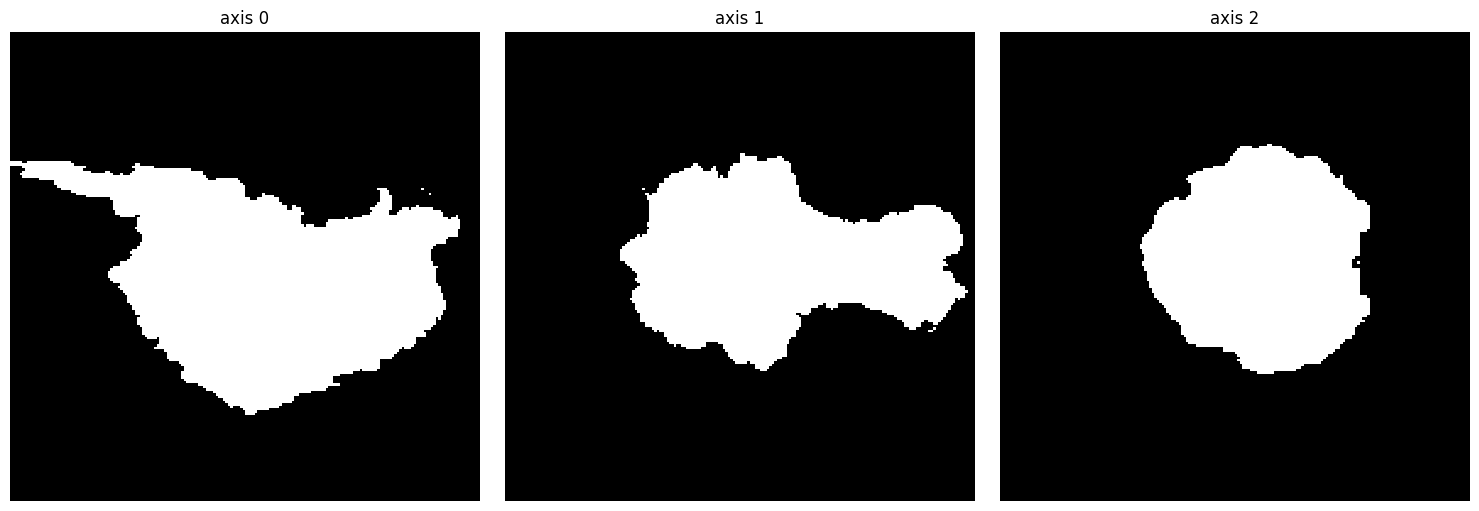

(<Figure size 1500x500 with 3 Axes>,
 [array([<AxesSubplot:title={'center':'axis 0'}>,
         <AxesSubplot:title={'center':'axis 1'}>,
         <AxesSubplot:title={'center':'axis 2'}>], dtype=object)])

In [27]:
template = sf.load_volume(os.path.join("/gpfs/fs001/cbica/home/dadashkj/upenn_pigAnatomical/template", "anat_brain_mask.nii.gz")).reshape((192,192,192)).data
ne.plot.volume3D(template, slice_nos=ms)

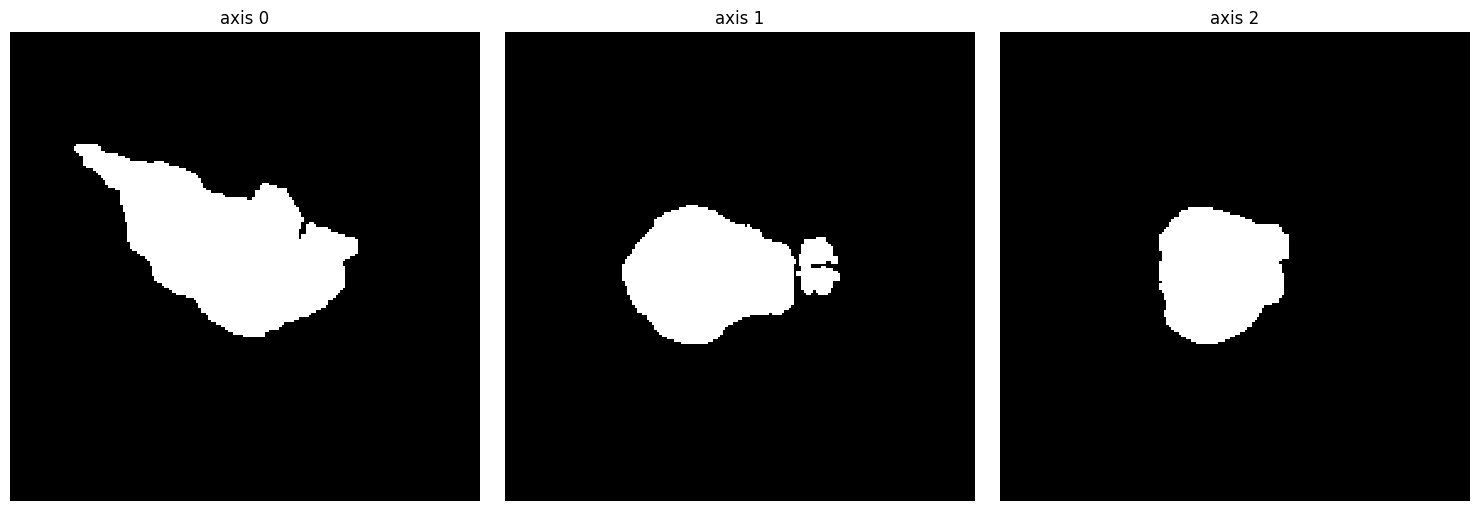

(<Figure size 1500x500 with 3 Axes>,
 [array([<AxesSubplot:title={'center':'axis 0'}>,
         <AxesSubplot:title={'center':'axis 1'}>,
         <AxesSubplot:title={'center':'axis 2'}>], dtype=object)])

In [8]:
ne.plot.volume3D(prediction, slice_nos=ms)

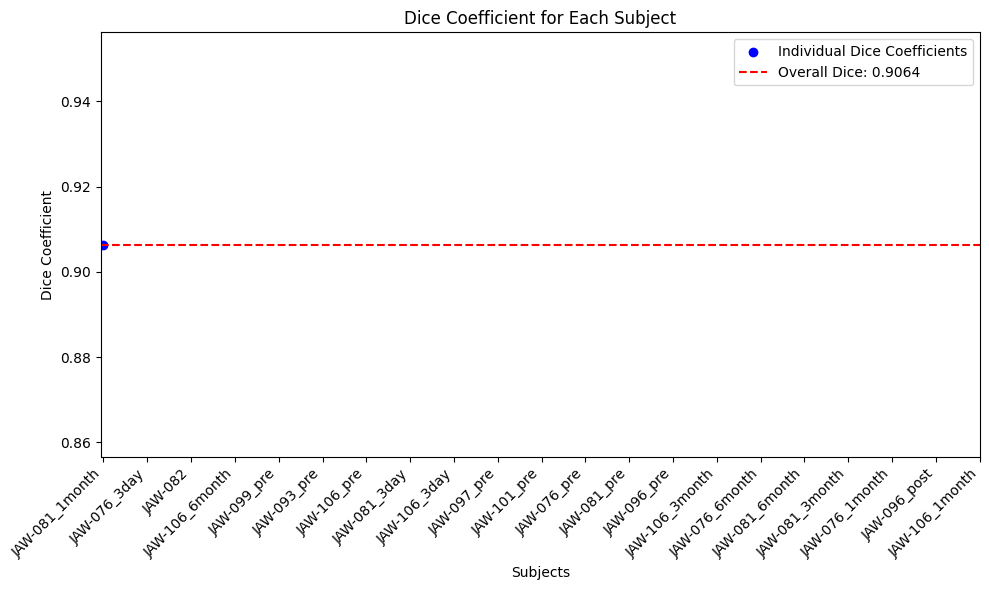

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(dice_scores)), dice_scores, color='blue', label='Individual Dice Coefficients')
plt.axhline(overall_dice, color='red', linestyle='--', label=f'Overall Dice: {overall_dice:.4f}')
plt.xlabel('Subjects')
plt.ylabel('Dice Coefficient')
plt.title('Dice Coefficient for Each Subject')
plt.legend()
plt.xticks(range(len(subfolders)), subfolders, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 73.2 MB/s eta 0:00:00:00:0100:01
